# General imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

%matplotlib inline
import cv2

In [6]:
COLOR = '#62d197'

# Data

In [9]:
# charge from pickle file
data = pd.read_pickle('../../data/cleaned_df.pkl')

images_df = data[['image', 'main_category', 'category_code']].copy()
images_df.head()

,image,main_category,category_code
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,6
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,5
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,5
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,6
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,6


In [11]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image          1050 non-null   object
 1   main_category  1050 non-null   object
 2   category_code  1050 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.7+ KB


In [13]:
images_df.groupby('main_category').count().reset_index()

,main_category,image,category_code
0,Baby Care,150,150
1,Beauty and Personal Care,150,150
2,Computers,150,150
3,Home Decor & Festive Needs,150,150
4,Home Furnishing,150,150
5,Kitchen & Dining,150,150
6,Watches,150,150


In [26]:
classes = images_df['main_category'].unique()

In [ ]:
def list_fct(name):
    list_img = images_df['image'].tolist()
    list_image_name = [list_img[i] for i in range(len(images_df)) if images_df['main_category'][i] == name]
    return list_image_name



for category in classes:
    print(f'Category: {category}')
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename =

# EDA

In [18]:
# Path to images folder
path = '../../data/Flipkart/Images/'

### Functions

In [38]:
def list_fct(category:str, image: str, path:str=path):
    list_image_name = [path + image[i] for i in range(len(images_df)) if images_df['main_category'][i] == category]
    return list_image_name

def extract_img_features(image, flag: object = cv2.IMREAD_COLOR, images_path: str = path) -> pd.DataFrame:
    """Extract image features from a list of images.

    Args:
        image (str): the name of the image
        flag (object): the flag to read the images (default: cv2.IMREAD_COLOR)
        images_path (str): the path to the images (default: path)
    Returns:
        m
    """
    try:
        image = cv2.imread(images_path + image, flag) # returns an array [height, width, channels]
        return image.shape[0], image.shape[1], image.shape[2], image.size
    except Exception as e:
        print(f'Error reading image: {image}')
        print(f'Error: {e}')
        return  None * 4

## Images features

In [25]:
images_df['height'], images_df['width'], images_df['channels'], images_df['size'] = zip(*images_df['image'].apply(extract_img_features))
images_df.tail(4)

,image,main_category,category_code,height,width,channels,size
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,5,1200,900,3,3240000
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,5,1011,1100,3,3336300
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,5,1200,900,3,3240000
1049,f2f027ad6a6df617c9f125173da71e44.jpg,Baby Care,5,1100,1100,3,3630000


In [27]:
images_df.describe()

,category_code,height,width,channels,size
count,1050.000000,1050.000000,1050.000000,1050.0,1.050000e+03
mean,3.000000,1220.038095,1196.570476,3.0,5.748901e+06
std,2.000953,744.841368,864.076765,0.0,1.175770e+07
min,0.000000,160.000000,145.000000,3.0,1.740000e+05
25%,1.000000,844.000000,747.250000,3.0,2.017125e+06
50%,3.000000,1100.000000,1100.000000,3.0,3.047550e+06
75%,5.000000,1360.000000,1214.250000,3.0,4.661820e+06
max,6.000000,11042.000000,8484.000000,3.0,2.810410e+08


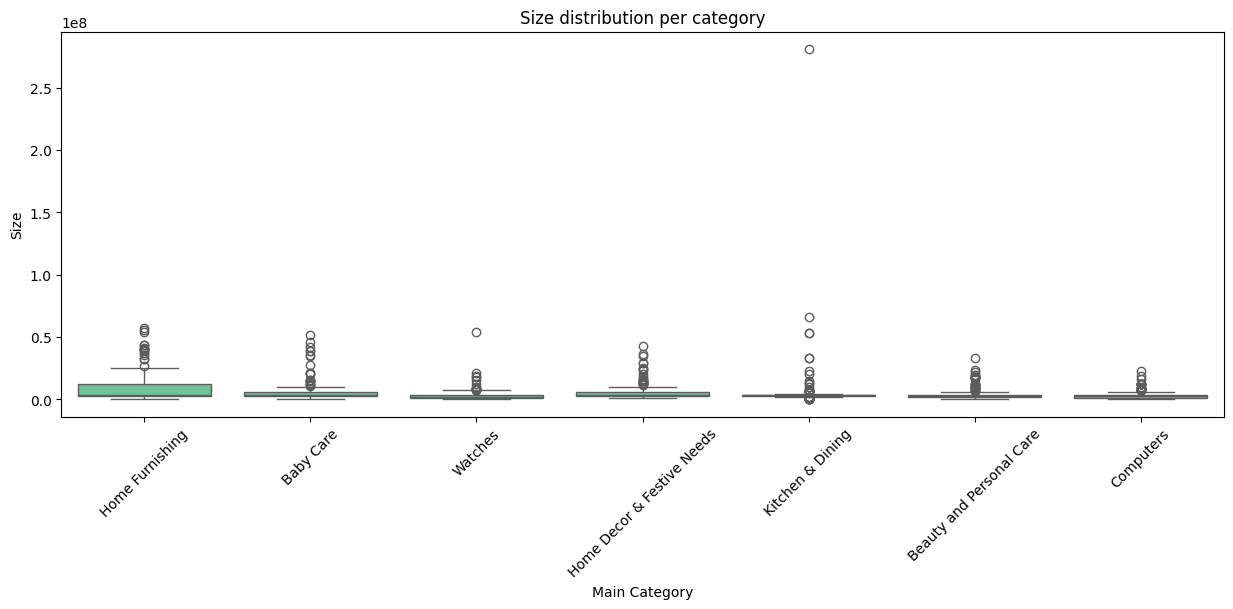

In [32]:
# Display stats per categories
plt.figure(figsize=(15, 5))
sns.boxplot(x='main_category', y='size', data=images_df, color=COLOR)
plt.title('Size distribution per category')
plt.xlabel('Main Category')
plt.ylabel('Size')
plt.xticks(rotation=45)
plt.show()

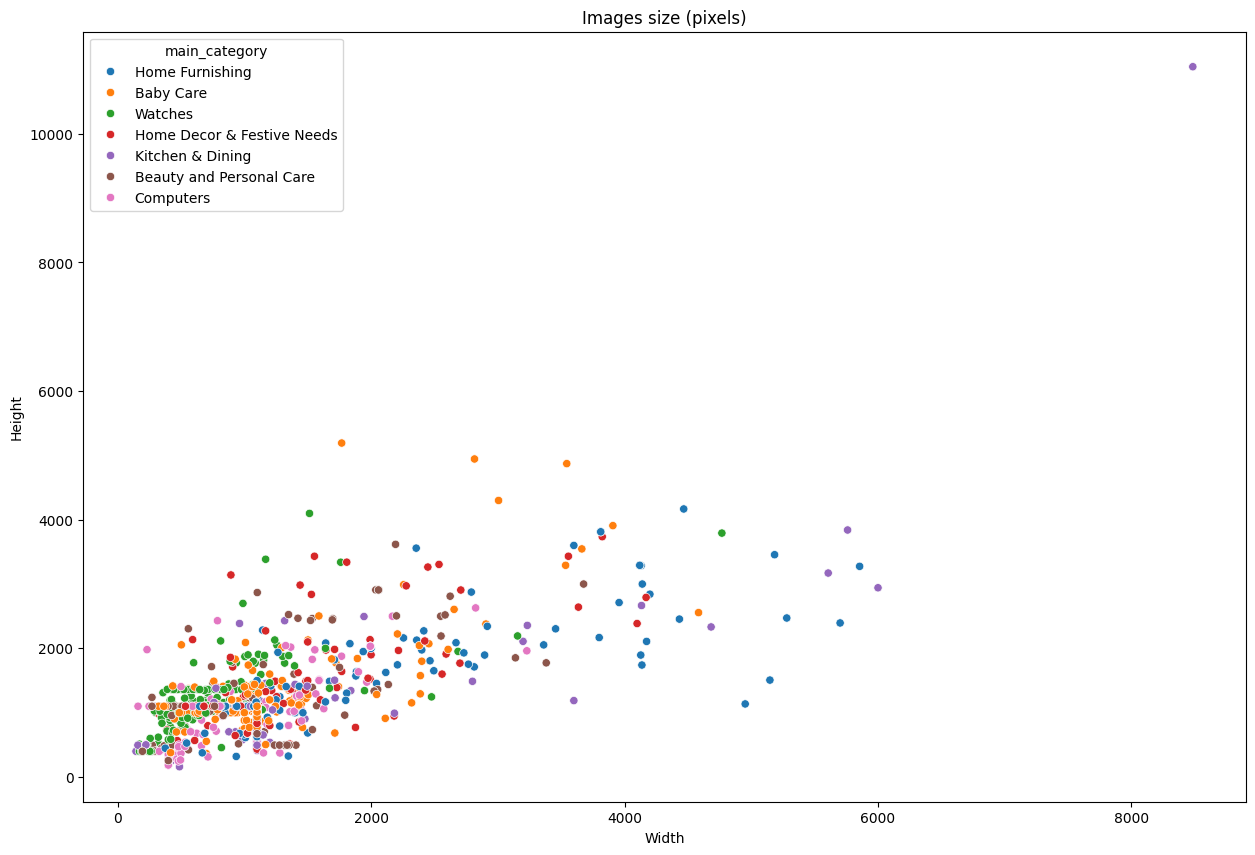

In [35]:
# Scatter plot of the witgh and length of the images
plt.figure(figsize=(15, 10))
sns.scatterplot(x='width', y='height', data=images_df, color=COLOR, hue='main_category')
plt.title('Images size (pixels)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

Pictures are all in colors with high definition (mean of 1200 pixels). We observe an outlier for the category Kitchen and dining.

## Display few images

Category: Home Furnishing


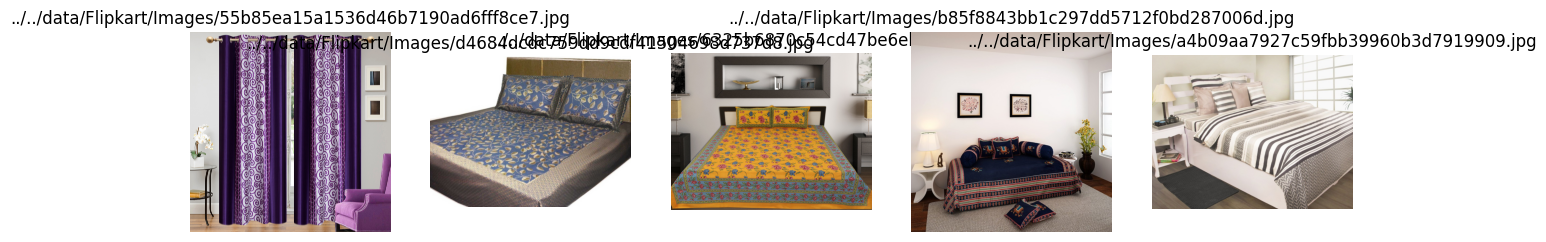

Category: Baby Care


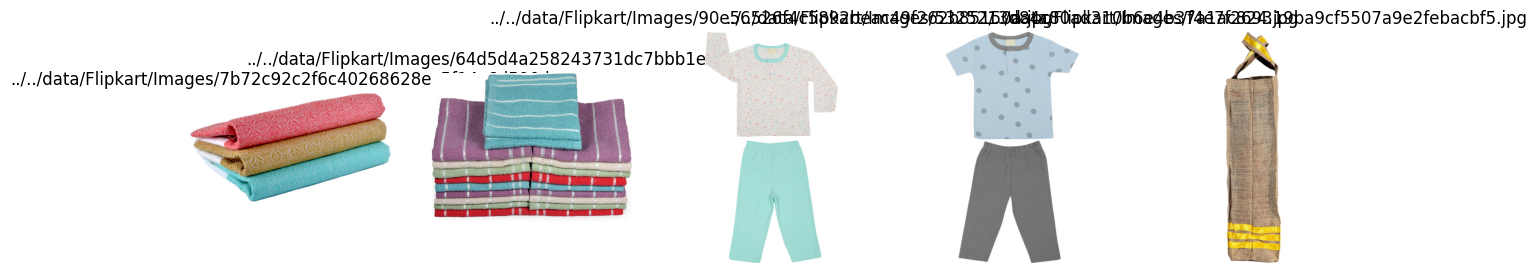

Category: Watches


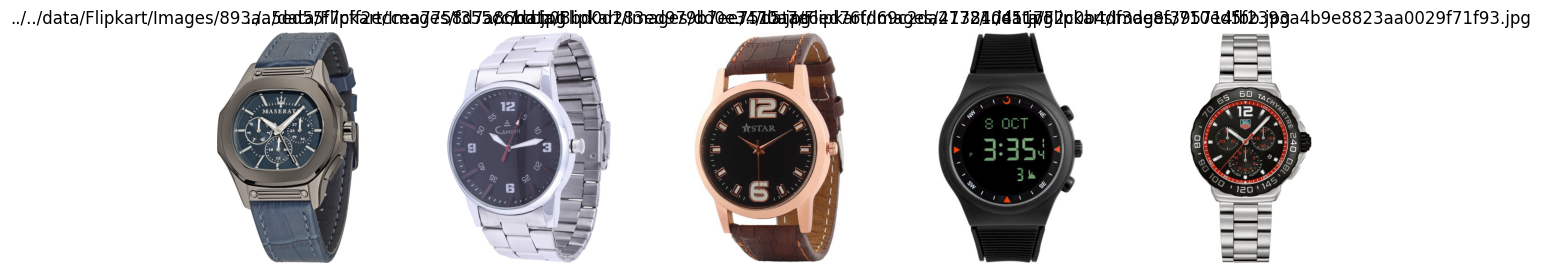

Category: Home Decor & Festive Needs


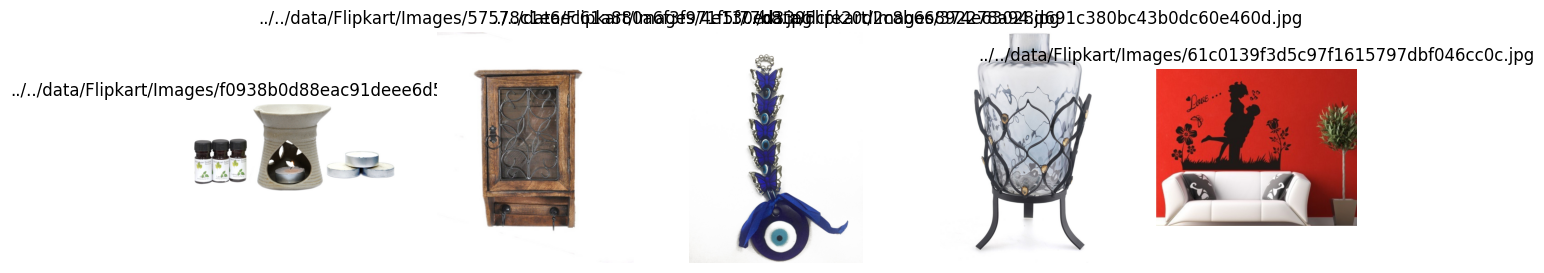

Category: Kitchen & Dining


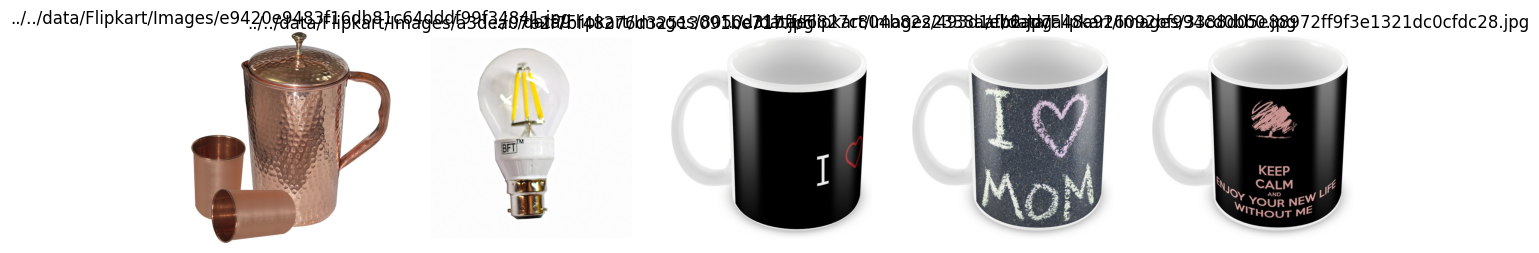

Category: Beauty and Personal Care


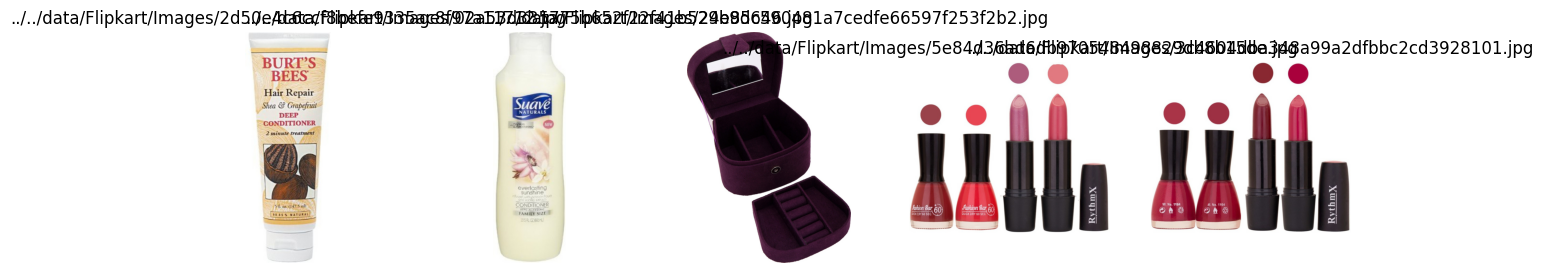

Category: Computers


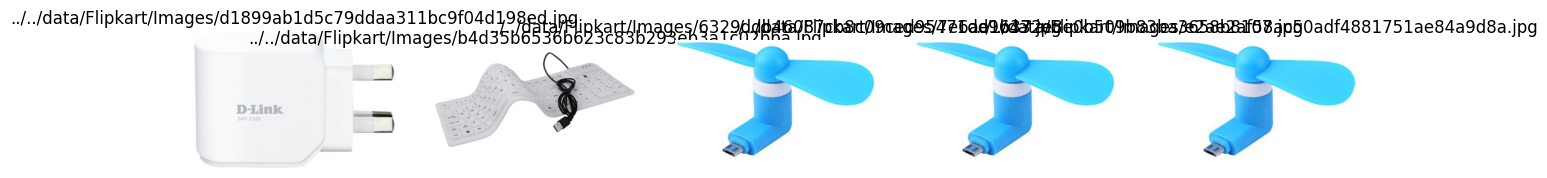

In [43]:
for category in classes:
    print(f'Category: {category}')
    images_pathes = list_fct(category, images_df['image'])

    plt.figure(figsize=(15, 3))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        filename = images_pathes[i]
        image = imread(filename)
        plt.imshow(image)
        plt.title(filename)
        plt.axis('off')
    plt.show()